In [3]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [96]:
#Helper method: Converting a csv file into a pandas database
try:
    df = pd.read_csv('detrended_data.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [97]:
df.head()

61251  61252  61253  61254  61256  61257  61258  61261  61264  61272  \
year                                                                         
649     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
650     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
651     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
652     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
653     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ...  061347M  061364M  061402M  061436M  061495M  061646M   061664M  \
year  ...                                                                   
649   ...      NaN      NaN      NaN      NaN      NaN      NaN  1.936838   
650   ...      NaN      NaN      NaN      NaN      NaN      NaN  1.605328   
651   ...      NaN      NaN      NaN      NaN      NaN      NaN  1.079118   
652   ...      NaN      NaN      NaN      NaN      NaN      NaN  0.424857   
653   ...      NaN      NaN      NaN      NaN      NaN      NaN -0.415379   

      061682M  061683M  061702M  
year                             
649       NaN      NaN      NaN  
650       NaN      NaN      NaN  
651       NaN      NaN      NaN  
652       NaN      NaN      NaN  
653       NaN      NaN      NaN  

[5 rows x 29 columns]

In [99]:
df.shape

(1357, 29)

<AxesSubplot:xlabel='year'>

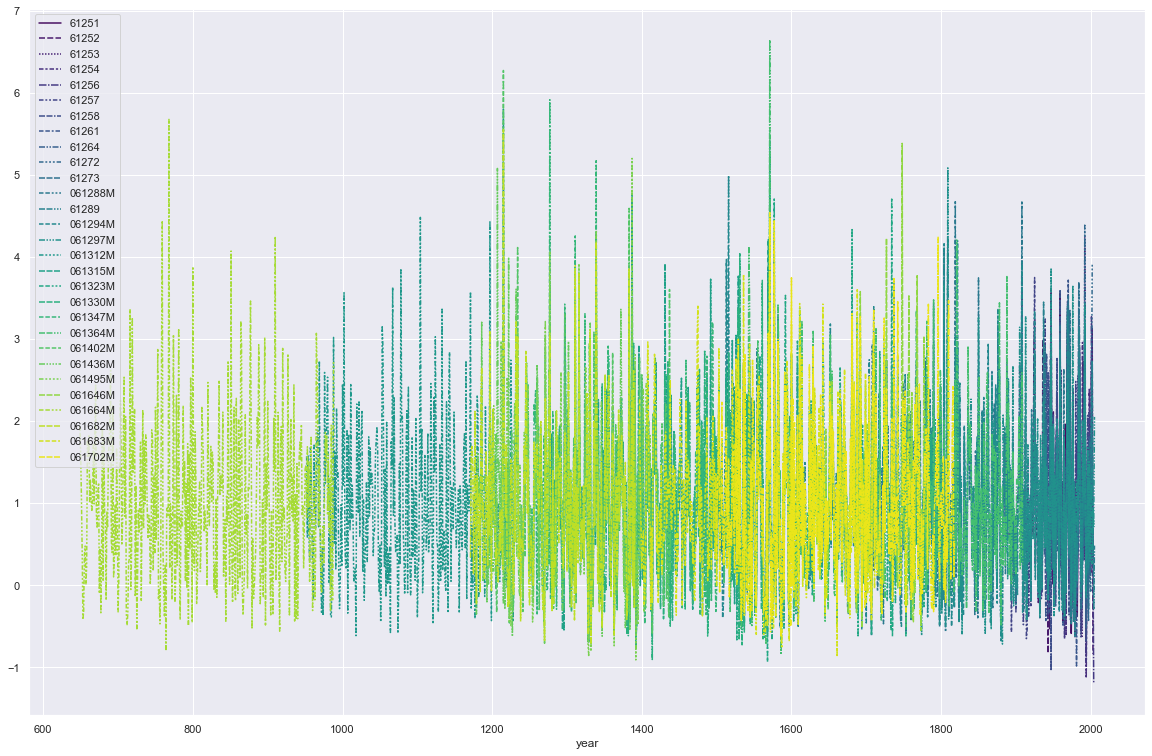

In [6]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df, palette='viridis')

In [7]:
#Helper method: Taking a csv file and converting it into a list of each sample with the null values removed as a numPy 
#array
samples = []
i= 0
for col in df.columns:
    col_list = df[col].to_numpy()
    samples.append(col_list[~np.isnan(col_list)])


print(samples)

[array([ 3.10220392e-01,  9.28430957e-01,  6.84413175e-01,  1.85469221e+00,
        1.94673981e+00,  8.40538477e-01,  5.41679722e-01,  4.08186869e-01,
        3.56622090e+00,  7.35574015e-01,  6.30536811e-01,  1.23715394e+00,
       -4.33130503e-01,  3.04567569e-01, -4.72558446e-01,  1.96505924e+00,
        1.09913900e+00,  1.87832871e+00,  3.10979630e+00,  2.58758464e+00,
        1.79257109e-01,  5.70400002e-01,  8.65651290e-01, -5.84546651e-01,
        1.49857428e-01,  2.05997780e+00,  4.50269741e-01,  7.02233052e-01,
       -3.09272608e-01,  4.15944916e-01,  1.16837658e+00, -3.74774570e-01,
        7.62693696e-01,  2.61030959e+00,  1.96571258e+00,  1.93421613e+00,
       -5.39384630e-02, -1.20452023e-01,  1.06429378e+00,  2.72992654e+00,
        2.36202951e+00,  1.84182333e+00,  7.10166371e-01, -2.21637600e-03,
        6.99203842e-01,  9.82718667e-01,  5.49773747e-01,  9.37825496e-01,
        3.04253368e-01,  1.54486022e-01,  2.55062633e+00]), array([ 0.46712658,  0.64460725,  0.315

In [408]:
#Helper method: Creating a master chronolgy from 20 samples 

df_master = df.iloc[:, [i for i in range(df.shape[1]) if i <= 19]].copy()
df_master['master_chronolgy'] = df_master.mean(axis=1)

<AxesSubplot:xlabel='year'>

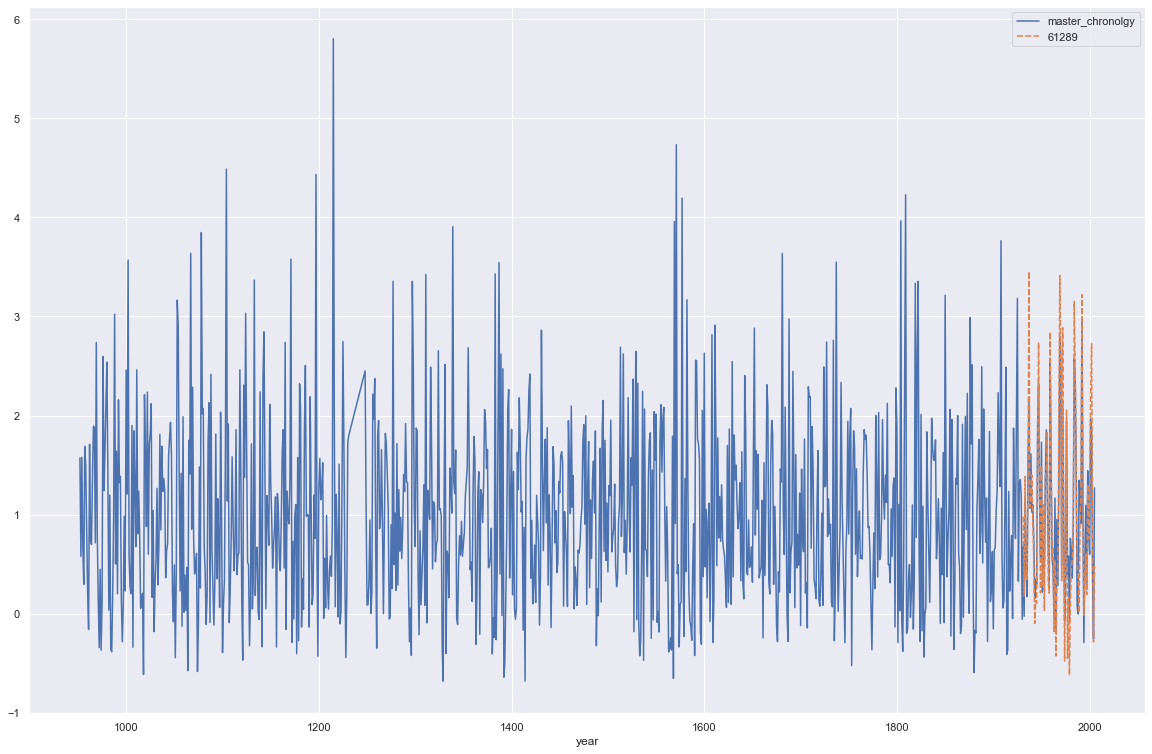

In [127]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df_master[['master_chronolgy','61289']])

In [412]:
samples2 = []
i=0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples2.append(cleanedList)
print(samples2)
print(len(samples2))
print(len(samples2[1]))  

[[0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015, 0.630536811, 1.237153945, -0.433130503, 0.304567569, -0.472558446, 1.965059237, 1.099138998, 1.878328707, 3.109796302, 2.587584637, 0.179257109, 0.570400002, 0.86565129, -0.584546651, 0.149857428, 2.059977802, 0.450269741, 0.702233052, -0.309272608, 0.415944916, 1.168376583, -0.37477457, 0.762693696, 2.61030959, 1.965712577, 1.934216125, -0.053938463, -0.120452023, 1.064293777, 2.729926542, 2.362029508, 1.841823328, 0.710166371, -0.002216376, 0.699203842, 0.982718667, 0.549773747, 0.937825496, 0.304253368, 0.154486022, 2.550626329], [0.467126577, 0.64460725, 0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208666363, 0.648171231, -0.302262991, 0.75832426, 0.486431639, -0.068179471, 2.998640064, 1.669050714, 1.869725245, 1.553429348, 0.796013055, 1.649920655, 0.104585878, -0

In [413]:
samples3 = []
i=0
for col in df_master.columns:
    col_list = df_master[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples3.append(cleanedList)
print(samples3)
print(len(samples3))
print(len(samples3[1])) 

[[0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015, 0.630536811, 1.237153945, -0.433130503, 0.304567569, -0.472558446, 1.965059237, 1.099138998, 1.878328707, 3.109796302, 2.587584637, 0.179257109, 0.570400002, 0.86565129, -0.584546651, 0.149857428, 2.059977802, 0.450269741, 0.702233052, -0.309272608, 0.415944916, 1.168376583, -0.37477457, 0.762693696, 2.61030959, 1.965712577, 1.934216125, -0.053938463, -0.120452023, 1.064293777, 2.729926542, 2.362029508, 1.841823328, 0.710166371, -0.002216376, 0.699203842, 0.982718667, 0.549773747, 0.937825496, 0.304253368, 0.154486022, 2.550626329], [0.467126577, 0.64460725, 0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208666363, 0.648171231, -0.302262991, 0.75832426, 0.486431639, -0.068179471, 2.998640064, 1.669050714, 1.869725245, 1.553429348, 0.796013055, 1.649920655, 0.104585878, -0

In [437]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples2)
for j in range(length):
    segments[j] = ([samples2[j][i : i + size] for i in range(0, len(samples2[j]), step)])
    j+=1
print(segments[19])
#print(segments[2])
#print(segments[28])
#print(segments[0])
print(segments[20])

[[2.451312738, 1.091620604, 0.086823081, 0.090845147, 0.332082906, 0.946484344, 0.002941259, 0.210558318, 2.216210864, 1.964245431], [1.091620604, 0.086823081, 0.090845147, 0.332082906, 0.946484344, 0.002941259, 0.210558318, 2.216210864, 1.964245431, 2.374169416], [0.086823081, 0.090845147, 0.332082906, 0.946484344, 0.002941259, 0.210558318, 2.216210864, 1.964245431, 2.374169416, 0.659190383], [0.090845147, 0.332082906, 0.946484344, 0.002941259, 0.210558318, 2.216210864, 1.964245431, 2.374169416, 0.659190383, -0.347468729], [0.332082906, 0.946484344, 0.002941259, 0.210558318, 2.216210864, 1.964245431, 2.374169416, 0.659190383, -0.347468729, 1.788722136], [0.946484344, 0.002941259, 0.210558318, 2.216210864, 1.964245431, 2.374169416, 0.659190383, -0.347468729, 1.788722136, 1.949783835], [0.002941259, 0.210558318, 2.216210864, 1.964245431, 2.374169416, 0.659190383, -0.347468729, 1.788722136, 1.949783835, 0.857982335], [0.210558318, 2.216210864, 1.964245431, 2.374169416, 0.659190383, -0.34

In [414]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments2 = {}

size = 10
step = 1
length = len(samples3)
for j in range(length):
    segments2[j] = ([samples3[j][i : i + size] for i in range(0, len(samples3[j]), step)])
    j+=1
print(segments2[1])
#print(segments[2])
#print(segments[28])
#print(segments[0])
print(segments2)

[[0.467126577, 0.64460725, 0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218], [0.64460725, 0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809], [0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239], [1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208666363], [1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208666363, 0.648171231], [0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208666363, 0.648171231, -0.302262991], [2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208666363, 0.648171231, -0.302262991, 0.75832426], [3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239, -0.208

In [416]:
#Statisical method: Returns a list of all possible combinations between the sample and the master chronology
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]
print(pairs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [419]:
#Statisical method: Returns a list of all possible combinations between the sample and the master chronology
master1_segments = segments2[20]
sample1_segments = segments2[19]
pairs2 =  [(x,y) for x in master_segments for y in sample_segments]
print(pairs2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [204]:
import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r - np.sqrt(n - 2)) / (np.sqrt(1 - (r * r)))
        t_vals[t] = (seg1,seg2)
print(t_vals)
t_vals.keys()

{-3.3432528194881286: ([0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015], [0.467126577, 0.64460725, 0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218]), -3.05500253158952: ([0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015], [0.64460725, 0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809]), -2.7533296305930777: ([0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015], [0.315969691, 1.576263095, 1.118141077, 0.622568647, 2.878224327, 3.239338246, 0.252768449, 0.866382218, 0.677435809, 0.584398239]), -2.655675309631465: ([0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.7

dict_keys([-3.3432528194881286, -3.05500253158952, -2.7533296305930777, -2.655675309631465, -3.115535204085396, -2.9120130707975638, -3.4422301766623304, -2.950478474936719, -2.819883991084414, -3.444824939047054, -2.80375695243922, -2.797996110463819, -2.6983355613064983, -2.9263062224896075, -2.7995178927740523, -2.6842923280360207, -2.945571420398061, -3.1562664901474298, -3.0425718552682426, -3.2386073569189966, -2.656210962600896, -2.653895144182599, -3.084525284570458, -3.8355650083804185, -2.6459188672262295, -2.6806912363990074, -2.803070550950135, -2.738961274473793, -2.9545198327750053, -2.7589097197096564, -3.20866085764578, -2.9968406227219075, -3.1063801565694726, -3.2128864523646206, -2.6528021841190506, -3.9493459366372052, -3.3690904360527876, -2.9001325896025283, -2.6553489671775354, -3.341331825053576, -2.8756610613458427, -3.2708620822787857, -2.909281835693286, -2.6533380357910157, -2.676733451521177, -3.248770300540552, -2.6543789745183237, -2.7744047043695597, -2.

In [420]:
import scipy.stats
t_vals2 = {}
for i in range(len(pairs2)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r - np.sqrt(n - 2)) / (np.sqrt(1 - (r * r)))
        t_vals2[t] = (seg1,seg2)
print(t_vals2)
t_vals2.keys()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



dict_keys([-2.7200484618245606, -3.1297700624285527, -2.9900861154900307, -3.61340843856056, -3.9432223722103297, -2.7931144397597545, -2.666078522966686, -3.0985662157599982, -2.9763377436071288, -2.725468205182098, -2.681461316156625, -4.526656916781849, -3.418032046524388, -2.7380714083546063, -2.84856309623565, -2.7716438021703422, -2.903779935896879, -2.6741641793845647, -2.696435164665477, -2.710964419613927, -3.229934878798285, -3.71987883404753, -2.7230949291413356, -2.710589834779384, -3.008872478521895, -2.6977598126563875, -3.282863643779573, -3.4881696207167594, -2.6499016672516316, -3.2153402963666777, -3.143125625865805, -3.5211401925857495, -2.6468909274688692, -2.6542674505359085, -3.561833189230197, -2.8562272732531406, -2.655508823637937, -2.6666031153122725, -3.014661919089205, -2.853216718510381, -2.671158314767867, -2.762192190094415, -3.2775888944505396, -3.001404230004432, -3.840913363145003, -2.712184398974925, -3.418853097856937, -2.6835343019822564, -2.7216609

In [208]:
#Find the pairs with the highest t values
values = list(t_vals.keys())
print(values)
#Method 1: Find the absolute max values
print(max(values, key=abs))
#Method 2: Find the values above the upper quartile and below the lower quartile
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers
outliers = detect_outlier(values)
print(outliers)
max_outliers = detect_outlier(outliers)
print(max_outliers)

[-3.3432528194881286, -3.05500253158952, -2.7533296305930777, -2.655675309631465, -3.115535204085396, -2.9120130707975638, -3.4422301766623304, -2.950478474936719, -2.819883991084414, -3.444824939047054, -2.80375695243922, -2.797996110463819, -2.6983355613064983, -2.9263062224896075, -2.7995178927740523, -2.6842923280360207, -2.945571420398061, -3.1562664901474298, -3.0425718552682426, -3.2386073569189966, -2.656210962600896, -2.653895144182599, -3.084525284570458, -3.8355650083804185, -2.6459188672262295, -2.6806912363990074, -2.803070550950135, -2.738961274473793, -2.9545198327750053, -2.7589097197096564, -3.20866085764578, -2.9968406227219075, -3.1063801565694726, -3.2128864523646206, -2.6528021841190506, -3.9493459366372052, -3.3690904360527876, -2.9001325896025283, -2.6553489671775354, -3.341331825053576, -2.8756610613458427, -3.2708620822787857, -2.909281835693286, -2.6533380357910157, -2.676733451521177, -3.248770300540552, -2.6543789745183237, -2.7744047043695597, -2.9090577258

In [422]:
#Find the pairs with the highest t values
values2 = list(t_vals2.keys())
print(values2)
#Method 1: Find the absolute max values
print(max(values2, key=abs))
#Method 2: Find the values above the upper quartile and below the lower quartile
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers
outliers2 = detect_outlier(values2)
print(outliers2)
max_outliers2 = detect_outlier(outliers2)
print(max_outliers2)

[-2.7200484618245606, -3.1297700624285527, -2.9900861154900307, -3.61340843856056, -3.9432223722103297, -2.7931144397597545, -2.666078522966686, -3.0985662157599982, -2.9763377436071288, -2.725468205182098, -2.681461316156625, -4.526656916781849, -3.418032046524388, -2.7380714083546063, -2.84856309623565, -2.7716438021703422, -2.903779935896879, -2.6741641793845647, -2.696435164665477, -2.710964419613927, -3.229934878798285, -3.71987883404753, -2.7230949291413356, -2.710589834779384, -3.008872478521895, -2.6977598126563875, -3.282863643779573, -3.4881696207167594, -2.6499016672516316, -3.2153402963666777, -3.143125625865805, -3.5211401925857495, -2.6468909274688692, -2.6542674505359085, -3.561833189230197, -2.8562272732531406, -2.655508823637937, -2.6666031153122725, -3.014661919089205, -2.853216718510381, -2.671158314767867, -2.762192190094415, -3.2775888944505396, -3.001404230004432, -3.840913363145003, -2.712184398974925, -3.418853097856937, -2.6835343019822564, -2.721660969518729, 

In [449]:
std = np.std(values)
mean = np.mean(values)
print(mean)
out_up = mean+4*std
print(out_up)
out_down = mean-4*std
print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])
print(outlying)
max_outlying = (max(outlying, key=abs))
print(max_outlying)
'''outli = [x for x in values if x <= out_up]
outli.append(x for x in values if x > out_down)
print(outli)'''

-3.0569640016867363
-0.9764817905773797
-5.1374462127960925
[-5.969273801954733, -5.199549257196085, -5.406751730446422, -6.629143808065085, -7.4638488517805275, -6.167641865423915, -5.769249178812648, -6.266002607041269, -5.9547255561082535, -8.664772644612516, -7.387381322019584, -7.209821611761167, -6.671040546282607, -5.71103606655509, -6.181152673552264, -5.339890695888564, -6.31798124335244, -5.893944127304748]
-8.664772644612516


'outli = [x for x in values if x <= out_up]\noutli.append(x for x in values if x > out_down)\nprint(outli)'

In [452]:
(master_seg, sample_seg) = t_vals[max_outlying]
print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
print(samples2[0].index(master_seg[0]))
print(samples2[0].index(master_seg[1]))
print(samples2[1].index(sample_seg[0]))
print(samples2[1].index(sample_seg[1]))


[0.702233052, -0.309272608, 0.415944916, 1.168376583, -0.37477457, 0.762693696, 2.61030959, 1.965712577, 1.934216125, -0.053938463] [1.669050714, 1.869725245, 1.553429348, 0.796013055, 1.649920655, 0.104585878, -0.823812024, 0.082250531, -0.536391623, 2.363161489]
27
28
19
20


In [440]:
std2 = np.std(values2)
mean2 = np.mean(values2)
print(mean2)
out_up2 = mean2+4*std2
print(out_up2)
out_down2 = mean2-4*std2
print(out_down2)
outlying2 = []
for x in range(len(values)):
    if values2[x] >= out_up2 or values2[x] <= out_down2: 
        outlying2.append(values2[x])
print(outlying2)
max_outlying2 = (max(outlying2, key=abs))
print(max_outlying2)
'''outli = [x for x in values if x <= out_up]
outli.append(x for x in values if x > out_down)
print(outli)'''

-3.042205423574417
-1.0347522435358378
-5.049658603612996
[-5.086811764449819, -5.794214077332809, -5.167132682814796, -5.220272860155104, -5.406928920807104, -5.1442270881593135, -5.737622078113795, -5.498335268396271, -5.66851660907958, -5.519875720008928, -5.3674926650031525, -5.644457929315027, -5.293390117512039, -6.332364098488467, -5.157084776531778, -5.505217928464208, -5.419612353563425, -5.3125854400673305, -5.320750790454065, -10.550540492760623, -5.89413270286763, -5.134937856521798, -5.229756151493046, -6.621832611765418, -6.164202979034568, -5.83339483852765, -5.297815059296491, -6.700152213478028, -6.06588058983632, -6.190751117793799, -5.374750182045167, -5.143743495390568, -5.2910124025266745, -5.684879279118139, -5.6440952017246175]
-10.550540492760623


'outli = [x for x in values if x <= out_up]\noutli.append(x for x in values if x > out_down)\nprint(outli)'

In [462]:
samples2[0].index(master_seg[0]) - samples2[1].index(sample_seg[0])


8

In [467]:
#Fix the padding issues (Think i may have cracked it)
indices = np.where(df["61251"] == master_seg[0])
indices2 = np.where(df["61251"] == samples2[0][0])
print(indices)
print(indices2)
print(samples2[1].index(sample_seg[0]))
start = indices[0]-samples2[1].index(sample_seg[0])-1
print("start",start)
print("Legth",len(samples2[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]-1
padding_end = len(df.index) - (padding + len(samples2[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples2[1])):
    chronology.append(samples2[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Algined']= chronology


(array([1329]),)
(array([1302]),)
19
start [1309]
Legth 86
Beginning 649
Ending 2005
Padding 1308
634
-37
Deletion 37
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

In [468]:
df.tail()

61251     61252     61253     61254     61256     61257     61258  \
year                                                                         
2001  2.550626  1.685742  1.440203  2.779292  3.275103  1.802389  1.605915   
2002       NaN  3.130358  1.519482  0.824871  2.228236  1.250185  1.655677   
2003       NaN -0.833864       NaN  0.299505  0.417891       NaN       NaN   
2004       NaN       NaN       NaN       NaN -1.191305       NaN       NaN   
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

         61261     61264     61272  ...  061402M  061436M  061495M  061646M  \
year                                ...                                       
2001  2.233491  1.175881  2.278505  ...      NaN      NaN      NaN      NaN   
2002       NaN  1.695051  3.922880  ...      NaN      NaN      NaN      NaN   
2003       NaN       NaN       NaN  ...      NaN      NaN      NaN      NaN   
2004       NaN       NaN       NaN  ...      NaN      NaN      NaN      NaN   
2005       NaN       NaN       NaN  ...      NaN      NaN      NaN      NaN   

      061664M  061682M  061683M  061702M  Allgined   Algined  
year                                                          
2001      NaN      NaN      NaN      NaN  0.187069  0.274645  
2002      NaN      NaN      NaN      NaN  1.552336  0.273705  
2003      NaN      NaN      NaN      NaN  1.334462  0.604366  
2004      NaN      NaN      NaN      NaN  0.369889 -0.079397  
2005      NaN      NaN      NaN      NaN  2.507302  0.864194  

[5 rows x 31 columns]

<AxesSubplot:xlabel='year'>

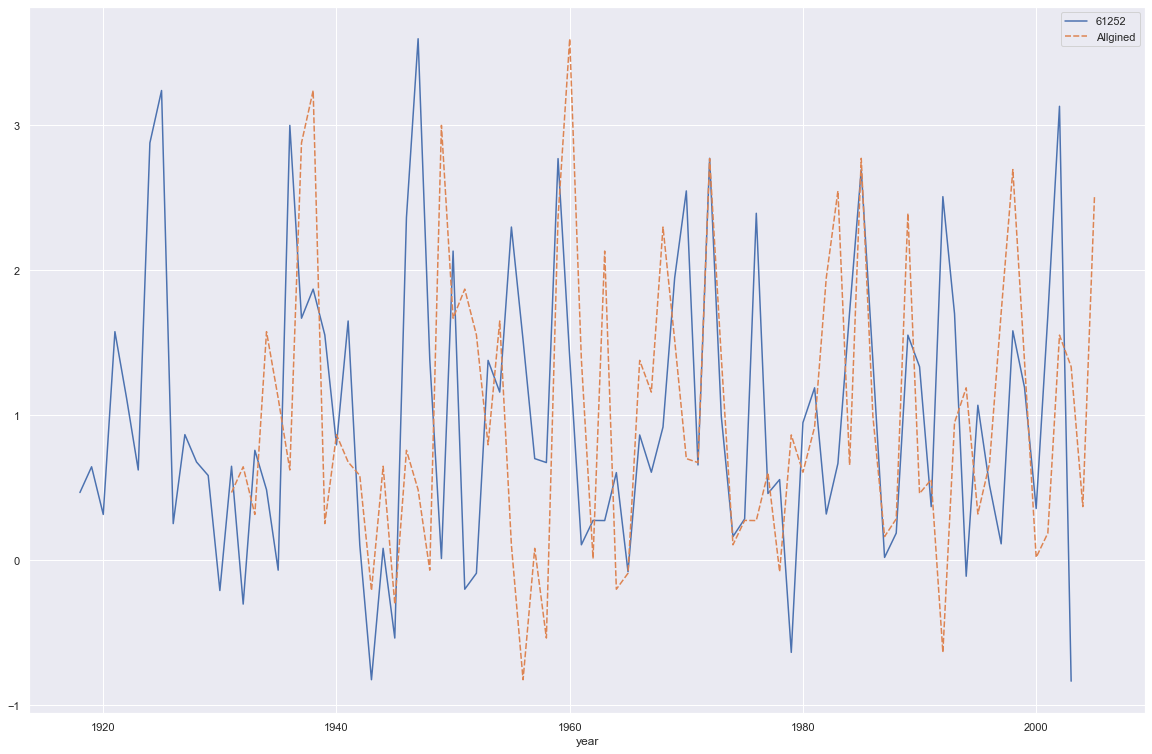

In [469]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61252",'Allgined']])

<AxesSubplot:xlabel='year'>

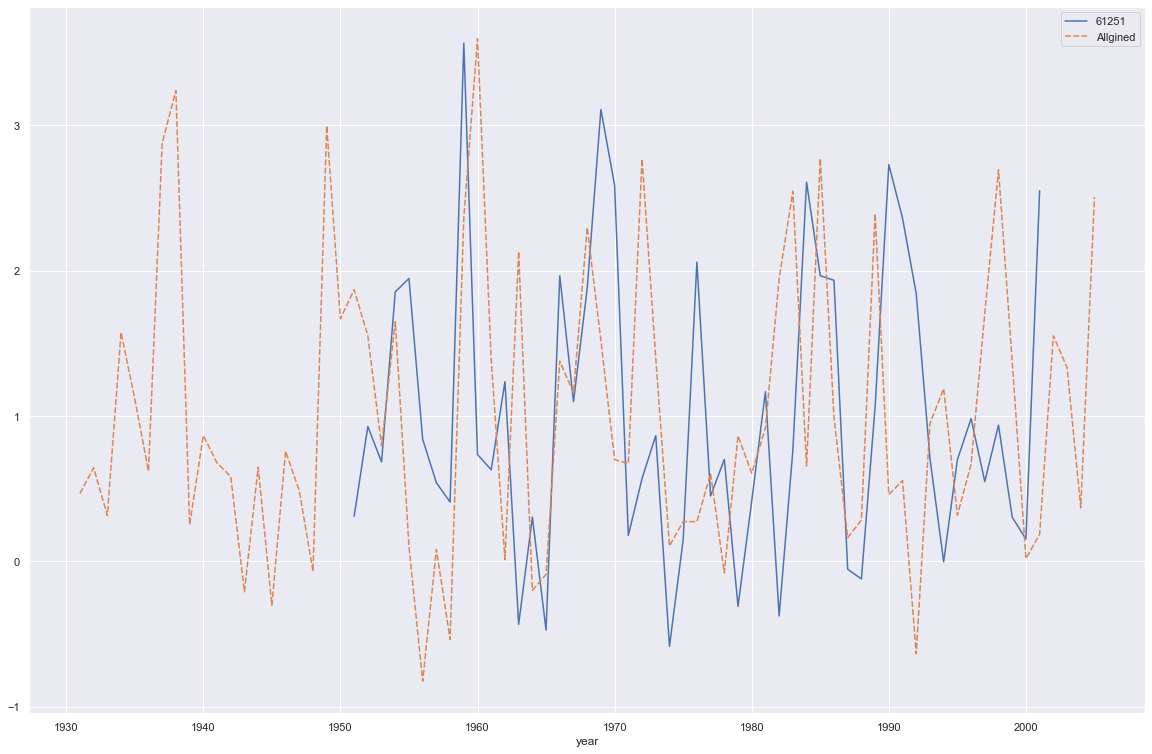

In [460]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61251",'Allgined']])

## Trialed methods that are not used.

In [445]:
(master_seg2, sample_seg2) = t_vals2[max_outlying2]
print(master_seg2, sample_seg2)
#Would need to check both lists are sequential for the entire segment 
print(samples2[0].index(master_seg2[0]))
print(samples2[0].index(master_seg2[1]))
print(samples2[1].index(sample_seg2[0]))
print(samples2[1].index(sample_seg2[1]))


[1.297089492, 0.587806835, 1.687170243, 2.13568737, 1.222129765, 0.727390032, 1.090020935, 0.096134923, -0.326879098, 0.098687824] [0.217085774, 1.395887921, -0.840847754, -0.625329278, 0.080864327, 0.15398584, -0.210031635, 1.486839087, 1.94854348, 1.520811385]


ValueError: 1.297089492 is not in list

In [35]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using numPy arrays and matrices)

def overlap(array, len_chunk, len_sep=1):
    """Returns a matrix of all full overlapping chunks of the input `array`, with a chunk
    length of `len_chunk` and a separation length of `len_sep`. Begins with the first full
    chunk in the array.  """

    n_arrays = int(np.ceil((array.size - len_chunk + 1) / len_sep))

    array_matrix = np.tile(array, n_arrays).reshape(n_arrays, -1)

    columns = np.array(((len_sep*np.arange(0, n_arrays)).reshape(n_arrays, -1) + np.tile(
        np.arange(0, len_chunk), n_arrays).reshape(n_arrays, -1)), dtype=np.intp)

    rows = np.array((np.arange(n_arrays).reshape(n_arrays, -1) + np.tile(
        np.zeros(len_chunk), n_arrays).reshape(n_arrays, -1)), dtype=np.intp)
        
    return array_matrix[rows, columns]

In [92]:
segments2 = {}
length = len(samples)
for i in range(length):
    g = overlap(samples[i] , 10, 7)
    i+=1
    segments2[i] = g
print(segments2)
    

{1: array([[ 3.10220392e-01,  9.28430957e-01,  6.84413175e-01,
         1.85469221e+00,  1.94673981e+00,  8.40538477e-01,
         5.41679722e-01,  4.08186869e-01,  3.56622090e+00,
         7.35574015e-01],
       [ 4.08186869e-01,  3.56622090e+00,  7.35574015e-01,
         6.30536811e-01,  1.23715394e+00, -4.33130503e-01,
         3.04567569e-01, -4.72558446e-01,  1.96505924e+00,
         1.09913900e+00],
       [-4.72558446e-01,  1.96505924e+00,  1.09913900e+00,
         1.87832871e+00,  3.10979630e+00,  2.58758464e+00,
         1.79257109e-01,  5.70400002e-01,  8.65651290e-01,
        -5.84546651e-01],
       [ 5.70400002e-01,  8.65651290e-01, -5.84546651e-01,
         1.49857428e-01,  2.05997780e+00,  4.50269741e-01,
         7.02233052e-01, -3.09272608e-01,  4.15944916e-01,
         1.16837658e+00],
       [-3.09272608e-01,  4.15944916e-01,  1.16837658e+00,
        -3.74774570e-01,  7.62693696e-01,  2.61030959e+00,
         1.96571258e+00,  1.93421613e+00, -5.39384630e-02,
       

In [148]:
def matching_pairs(segments):
    master_segments = segments[1]
    sample_segments = segments[2]
    pairs = {}
    if len(master_segments) > len(sample_segments):
        for i in range(len(master_segments)):
            for j in range(len(sample_segments)):
                pairs[-i] = (master_segments[i], sample_segments[j])
                j+=1
            i+=1
    else:
        for i in range(len(sample_segments)):
            for j in range(len(master_segments)):
                pairs[-i] = (master_segments[i], sample_segments[j])
                j+=1
            i+=1
    return pairs


In [135]:
matching_pairs(segments)

{0: ([0.467126577,
   0.64460725,
   0.315969691,
   1.576263095,
   1.118141077,
   0.622568647,
   2.878224327,
   3.239338246,
   0.252768449,
   0.866382218],
  [0.946757439,
   0.09259192,
   1.495174248,
   0.702620499,
   0.698007326,
   1.440202836,
   1.519482461]),
 -1: ([3.239338246,
   0.252768449,
   0.866382218,
   0.677435809,
   0.584398239,
   -0.208666363,
   0.648171231,
   -0.302262991,
   0.75832426,
   0.486431639],
  [0.946757439,
   0.09259192,
   1.495174248,
   0.702620499,
   0.698007326,
   1.440202836,
   1.519482461]),
 -2: ([-0.302262991,
   0.75832426,
   0.486431639,
   -0.068179471,
   2.998640064,
   1.669050714,
   1.869725245,
   1.553429348,
   0.796013055,
   1.649920655],
  [0.946757439,
   0.09259192,
   1.495174248,
   0.702620499,
   0.698007326,
   1.440202836,
   1.519482461]),
 -3: ([1.553429348,
   0.796013055,
   1.649920655,
   0.104585878,
   -0.823812024,
   0.082250531,
   -0.536391623,
   2.363161489,
   3.596266453,
   1.386199681],

In [159]:
import itertools
from itertools import permutations

master_segments = [1,2,3,4]
sample_segments = [1,2,3]

pairs = []

permut = itertools.permutations(master_segments, len(sample_segments))

for comb in permut:
    zipped = zip(comb, sample_segment)
    pairs.append(list(zipped))
    
print(pairs)

[[(1, 1), (2, 2), (3, 3)], [(1, 1), (2, 2), (4, 3)], [(1, 1), (3, 2), (2, 3)], [(1, 1), (3, 2), (4, 3)], [(1, 1), (4, 2), (2, 3)], [(1, 1), (4, 2), (3, 3)], [(2, 1), (1, 2), (3, 3)], [(2, 1), (1, 2), (4, 3)], [(2, 1), (3, 2), (1, 3)], [(2, 1), (3, 2), (4, 3)], [(2, 1), (4, 2), (1, 3)], [(2, 1), (4, 2), (3, 3)], [(3, 1), (1, 2), (2, 3)], [(3, 1), (1, 2), (4, 3)], [(3, 1), (2, 2), (1, 3)], [(3, 1), (2, 2), (4, 3)], [(3, 1), (4, 2), (1, 3)], [(3, 1), (4, 2), (2, 3)], [(4, 1), (1, 2), (2, 3)], [(4, 1), (1, 2), (3, 3)], [(4, 1), (2, 2), (1, 3)], [(4, 1), (2, 2), (3, 3)], [(4, 1), (3, 2), (1, 3)], [(4, 1), (3, 2), (2, 3)]]
